In [1]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
from matplotlib import rc
import platform
import pandas as pd
import matplotlib.pyplot as plt

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

In [2]:
# 선그래프
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [4]:
df = df.fillna(method = 'ffill')
df.head()
# 전출지가 '서울특별시'에서 다른 도시로 이전한 인구수의 분포를 분석하고자함
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] !='서울특별시')
df_seoul = df[mask]

#전출지별의 값은 모두 '서울특별시'이므로 칼럼삭제
df_seoul = df_seoul.drop('전출지별', axis=1)
# 전입지별 칼럼명을 '전입지'로 변경
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)

# 전입지 칼럼을 인덱스로 변경
df_seoul.set_index('전입지', inplace=True)


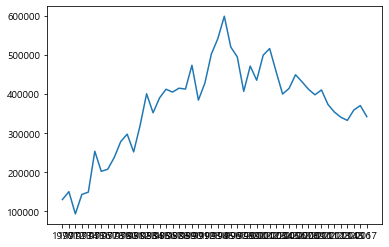

In [5]:
# df.seoul 에서 전입지가 '경기도'인 자료만 추출
sr_one = df_seoul.loc['경기도', : ]
sr_one

# 기본 선그래프로 그리기
plt.plot(sr_one)


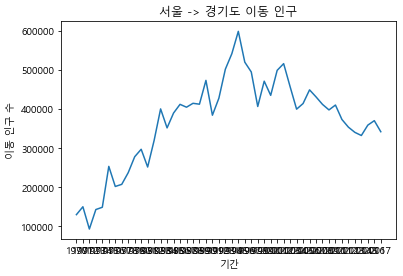

In [6]:
# df_seoul 에서 전입지가 '경기도'인 자료만 추출
sr_one = df_seoul.loc['경기도', :]
sr_one

# 기본 선 그래프로 그리기
plt.plot(sr_one)

# plt.plot(sr_one.index, sr_one.values)
# 그래프에 제목 추가, 축 이름 추가
# 서울 -> 경기도 이동 인구
# x축 이름 -> '기간', y축 이름 -> '이동 인구 수'
plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
           
plt.show()

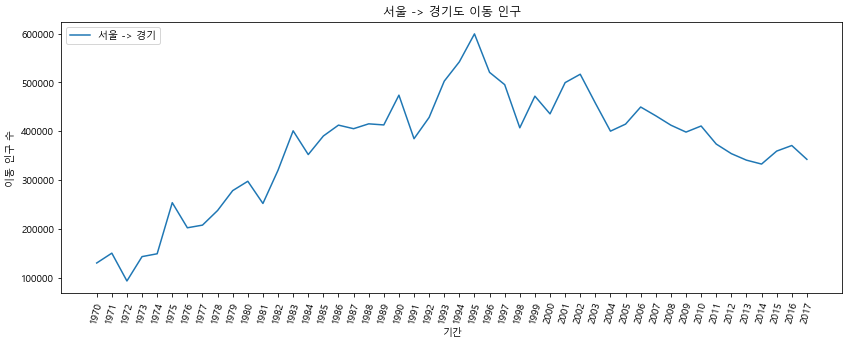

In [7]:
plt.figure(figsize = (14,5))
# plt.style.use('dark_background')    # 배경 검은색으로

# x축 눈금 라벨 회전 : plt.xticks(rotation = 'verticla')
plt.xticks(rotation = 'verticla')
plt.xticks(rotation = 75)     # 숫자는 회전 각도를 의미
plt.plot(sr_one)

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.legend(labels = ['서울 -> 경기'], loc = 'upper left')
plt.show()

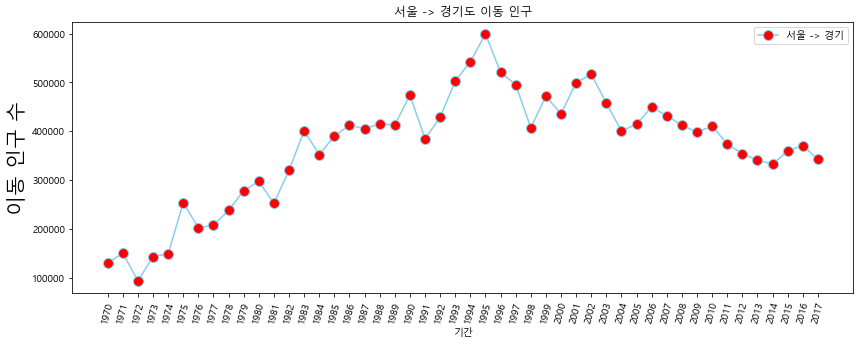

In [11]:
plt.figure(figsize = (14,5))
plt.xticks(size = 10, rotation = 75)
# plt.style.use('dark_background')    # 배경 검은색으로

plt.plot(sr_one, marker = 'o', markersize = 10, color = 'skyblue', mfc = 'red')

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수', size = 20)
plt.legend(labels = ['서울 -> 경기'], loc = 'best')
plt.show()

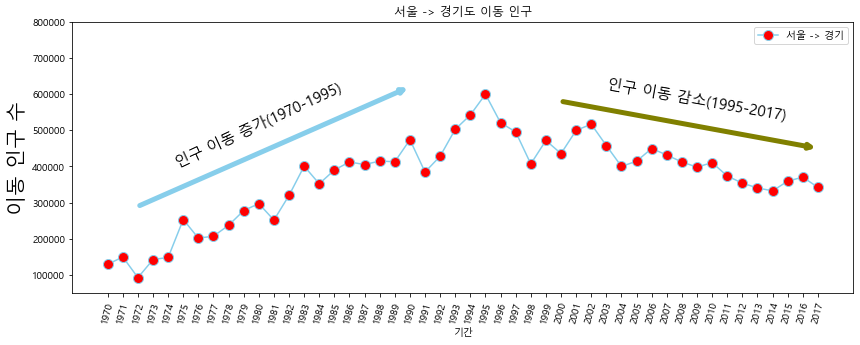

In [35]:
plt.figure(figsize = (14,5))
plt.xticks(size = 10, rotation = 75)
# plt.style.use('dark_background')    # 배경 검은색으로

plt.plot(sr_one, marker = 'o', markersize = 10, color = 'skyblue', mfc = 'red')

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수', size = 20)
plt.legend(labels = ['서울 -> 경기'], loc = 'best')

# 설명(주석) 추가
# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000,800000)

# 주석 표시 : 화살표 정의
plt.annotate('',
             xy = (20,620000),        # 화살표의 머리 부분(끝점)
             xytext = (2,290000),    # 화살표의 꼬리 부분(시작점)
            arrowprops = dict(arrowstyle='->', color='skyblue', lw = 5)
            )     

plt.annotate('',
             xy = (47,450000),        # 화살표의 머리 부분(끝점)
             xytext = (30,580000),    # 화살표의 꼬리 부분(시작점)
            arrowprops = dict(arrowstyle='->', color='olive', lw = 5)
            )     
# 주석 표시 : 문장
plt.annotate("인구 이동 증가(1970-1995)",
             xy = (10,400000),
             rotation = 25,
             va = 'baseline',
             ha = 'center',
             fontsize = 15
            )

plt.annotate("인구 이동 감소(1995-2017)",
             xy = (39,530000),
             rotation = -10,
             va = 'baseline',
             ha = 'center',
             fontsize = 15
            )

plt.show()

C:\Users\HPE\AppData\Local\Temp\ipykernel_6772\712576946.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 90)
C:\Users\HPE\AppData\Local\Temp\ipykernel_6772\712576946.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


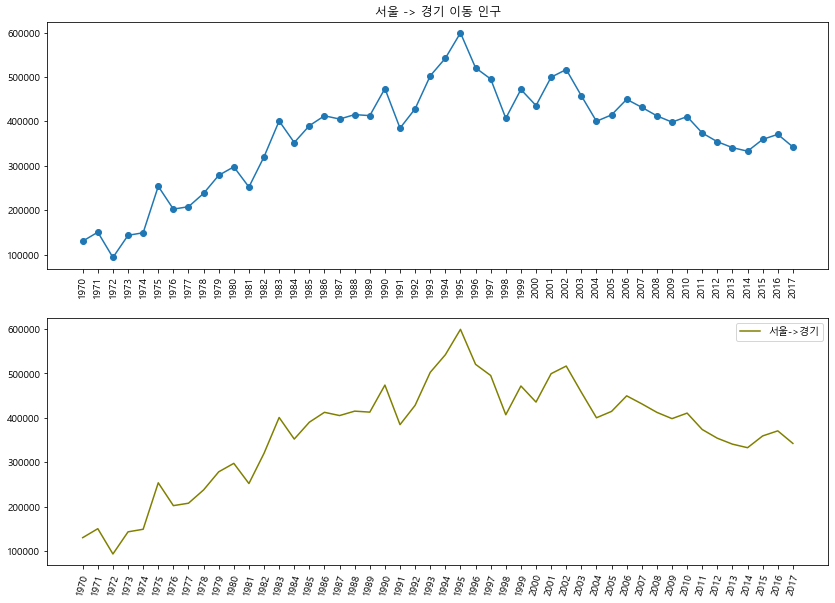

In [55]:
# 한 화면에 두개의 그래프 그리기 : add_subplot()
fig = plt.figure(figsize = (14,10))
ax1 = fig.add_subplot(2,1,1)      # 한 행에 2개, 1열에 1개, 위치
ax2 = fig.add_subplot(2,1,2) 

# axe 객체에 plot함수로 그래프 그리기
ax1.plot(sr_one, marker = 'o')
ax2.plot(sr_one, color = 'olive', label = '서울->경기')

ax1.set_title('서울 -> 경기 이동 인구')
ax1.set_xticklabels(sr_one.index, rotation = 90)

ax2.legend(loc = 'best')
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show()


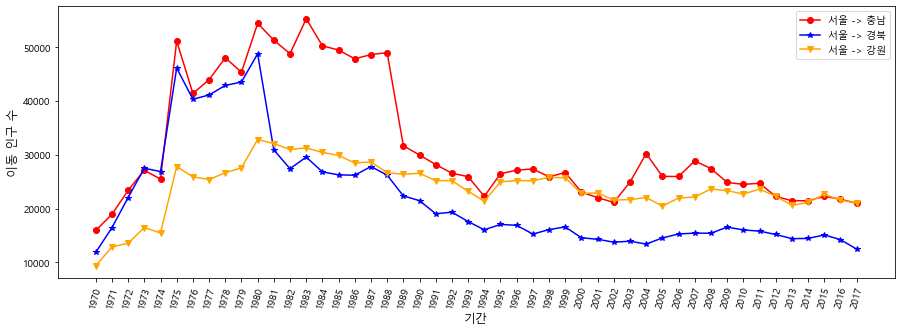

In [81]:
col_years = list(map( str, range(1970, 2018)))  # 년도를 1970~2017

sr_two = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

# ax 에 그래프 추가
ax.plot(col_years, sr_two.loc['충청남도', :], color = 'red',
        marker = 'o', label = '서울 -> 충남')
ax.plot(col_years, sr_two.loc['경상북도', :], color = 'blue',
        marker = '*', label = '서울 -> 경북')
ax.plot(col_years, sr_two.loc['강원도', :], color = 'orange',
        marker = 'v', label = '서울 -> 강원')

ax.legend(loc = 'best')

# x label 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구 수', size = 12)
plt.xticks(rotation = 'verticla')
plt.xticks(rotation = 75)

plt.show()



C:\Users\HPE\AppData\Local\Temp\ipykernel_6772\2193645497.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\HPE\AppData\Local\Temp\ipykernel_6772\2193645497.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


[Text(0.0, 0, '1970'),
 Text(0.2, 0, '1971'),
 Text(0.4, 0, '1972'),
 Text(0.6000000000000001, 0, '1973'),
 Text(0.8, 0, '1974'),
 Text(1.0, 0, '1975')]

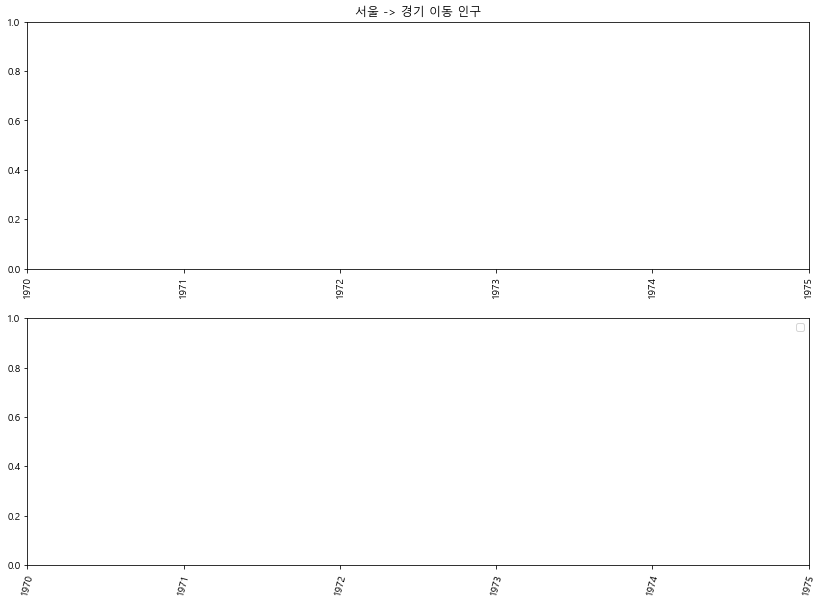

In [83]:
# df2 -> 충청남도, 경상북도, 강원도, 전라남도의 자료를 가져옴
# 1980년도에서 2016년까지의 자료만
col_years = list(map( str, range(1980, 2017)))  # 년도를 1980~2016

df2 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

fig = plt.figure(figsize = (14,10))
ax1 = fig.add_subplot(2,1,1)      # 한 행에 2개, 1열에 1개, 위치
ax2 = fig.add_subplot(2,1,2)

ax1.set_title('서울 -> 경기 이동 인구')
ax1.set_xticklabels(sr_one.index, rotation = 90)

ax2.legend(loc = 'best')
ax2.set_xticklabels(sr_one.index, rotation = 75)